In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [21]:
df = pd.read_csv("https://query.data.world/s/fgpmczptzlakpvpcuuoxrotp65hsjl")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# How many species do we have in this data together with their count?
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Clustering is an unsupervised learning algo. So we should not be using, this species column. Drop it

**Assignment: You are not required to do any such step**

In [23]:
# Drop Species column
df.drop("species", axis = 1, inplace = True)

We need to add an ID column, So that we may identify which flower belongs to which cluster once the clustering has been done.

**Assignment: You are not required to do this step because, you have been provided with the Country Name column that will act as the ID**

In [24]:
df['ID'] = df.index+100

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


Major Segments of your assignment///(NO PCA)

- Data Quality Check: PPT
- EDA
- Outlier Treatment
- Scaling
- Checking the tendency of the data: Hopkins Test
- Checing the best value for K: ssd, silhouette method
- Perfrom KMens with the final value of k
- Visualize the clusters using scatter plot
- Perfrom Cluster Profiling: GDPP, CHILD_MORT, INCOME
- -------------------------------------
- Hierarchical Clustering
- Single Linkage: Dendogram
- Complete Linkage: Dendogram
- Use the suitable method and perform the final cut
- Visualize the cluster
- Perfrom Cluster Profiling: GDPP, CHILD_MORT, INCOME
- --------------------------------------
- Using both the results, repor the countries that are in need of the AID

## Let's perfrom EDA

Here I will not do a very extensive EDA but for your assignment, please perfrom sufficient EDA(Univariate/Bivariate), Also, mention your inference from the EDA that you will conduct.

In [26]:
list(enumerate(f))

[(0, 'sepal_length'),
 (1, 'sepal_width'),
 (2, 'petal_length'),
 (3, 'petal_width')]

In [27]:
f

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

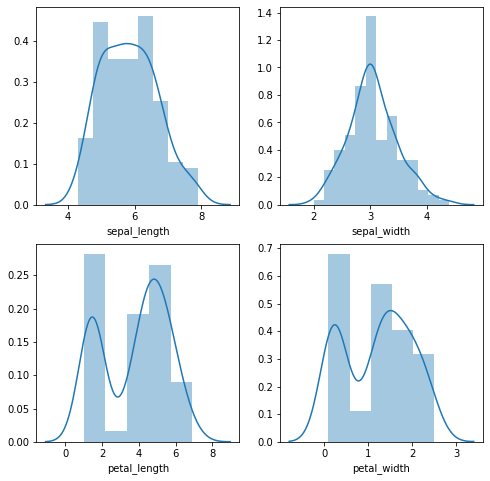

In [28]:
plt.figure(figsize = (8,8))
f = df.columns[:-1]
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

- That for sepal length and sepal width there are not groups that are present in the data?
- Petal length and petal width will be more helpful for creating the profile of my cluster

- We will be using all the columns for kmean/clustering but for profiling we will be using only PETAL LENGTH AND PETAL WIDTH

- --------------------------------------------
- For you assignment, you will be using all the columns for clustering and only 3 columns namely GDPP, CHILD_MORT and INCOME for profiling

## Outlier Teatment

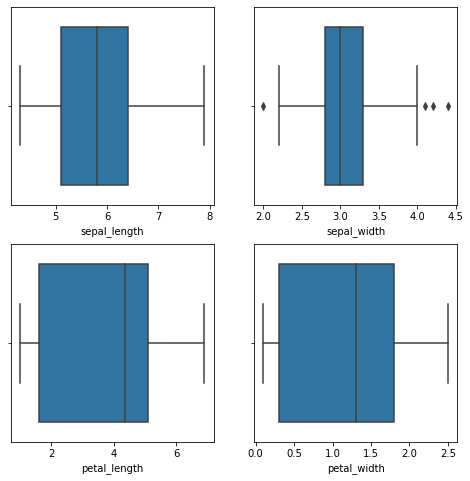

In [29]:
# To plot the box plot for all the columns
plt.figure(figsize = (8,8))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = i[1], data =df)

- For this demo, we will use soft capping as the method to deal with outliers.

**Assignment:**

- For columns such as child_mort, inflation, total_fer, you should not do anything to the upper range outliers but you may deal with the lower range outlier(capping).
- But for rest of the columns, you should not do anything for the lower range outliers but you may deal with the upper range outliers(capping)

In [30]:
q1 = df['sepal_width'].quantile(0.01)
q4 = df['sepal_width'].quantile(0.99)

df['sepal_width'][df['sepal_width']<=q1] = q1
df['sepal_width'][df['sepal_width']>=q4] = q4


C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## HOPKINS: Cluster Tendency
#### Check before scaling or after scaling

In [31]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [47]:
hopkins(df.drop("ID", axis = 1))

0.8562468111091708

## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop("ID", axis = 1))
df1

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.52664598e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.18393550e-01, -1.22754100e+00,
      

In [49]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


## Find the best value of K

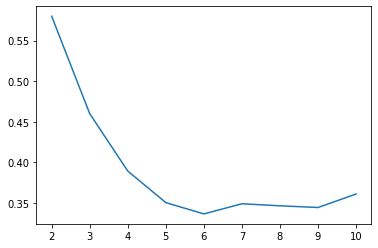

In [52]:
from sklearn.metrics import silhouette_score
# We looks at the maximum value

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

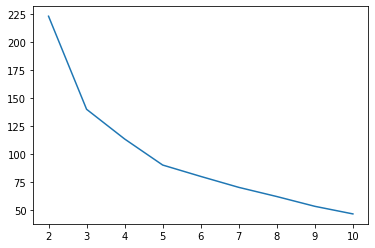

In [53]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

**Final KMeans with K==3**

In [79]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [80]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [81]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
0,5.1,3.5,1.4,0.2,100,1
1,4.9,3.0,1.4,0.2,101,1
2,4.7,3.2,1.3,0.2,102,1
3,4.6,3.1,1.5,0.2,103,1
4,5.0,3.6,1.4,0.2,104,1


In [83]:
df['cluster_id'] = kmean.labels_

In [84]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
0,5.1,3.5,1.4,0.2,100,1
1,4.9,3.0,1.4,0.2,101,1
2,4.7,3.2,1.3,0.2,102,1
3,4.6,3.1,1.5,0.2,103,1
4,5.0,3.6,1.4,0.2,104,1


In [85]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

2    56
1    50
0    44
Name: cluster_id, dtype: int64

## Plotting

- Petal Length
- Petal Width

**Assignment**
- GDPP
- Income
- Child_Mort

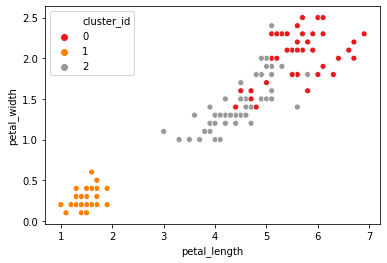

In [87]:
sns.scatterplot(x = 'petal_length', y ='petal_width', hue = 'cluster_id', data =df, palette = 'Set1')

## Cluster Profiling

To make sense out of the cluster

**Assignment**
- GDPP
- Income
- Child_Mort

So, in the case of your assignment, you objective is to find that cluster for which you have **LOW GDPP, LOW INCOME and HIGH CHILD_MORT**

In [90]:
df[['petal_length', 'petal_width', 'cluster_id']].groupby('cluster_id').mean()

,petal_length,petal_width
cluster_id,,
0,5.522727,1.981818
1,1.464000,0.244000
2,4.421429,1.435714


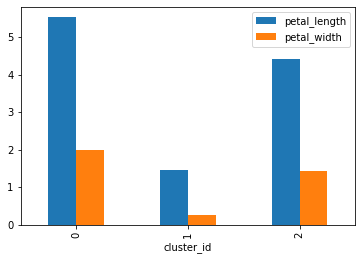

In [91]:
df[['petal_length', 'petal_width', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
# BOX PLOTS

Once you have identified the cluster that follows the profile which we are going for, the next steps is to find the top countries are that in need of the AID

In [92]:
c1 = df[df['cluster_id']==1]
c1.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
0,5.1,3.5,1.4,0.2,100,1
1,4.9,3.0,1.4,0.2,101,1
2,4.7,3.2,1.3,0.2,102,1
3,4.6,3.1,1.5,0.2,103,1
4,5.0,3.6,1.4,0.2,104,1


In [93]:
c1.sort_values(by = ['petal_length', 'petal_width'], ascending = [True, True]).head(5)

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
22,4.6,3.6,1.0,0.2,122,1
13,4.3,3.0,1.1,0.1,113,1
14,5.8,4.0,1.2,0.2,114,1
35,5.0,3.2,1.2,0.2,135,1
2,4.7,3.2,1.3,0.2,102,1


## Hierarchical Clustering

- Single and Complete Linkage
- Use one for final clustering
- Plot using scatter
- Profiling


- -----------------------
- Use both the results to report the countries that are in need of the AID

- --------------------

Note:
- It's fine if you get different number of clusters for kmean and hierarchical
- It's fine if the country names are different for different techniques
- It's fine if they are same
- Report your understanding on both NOTEBOOK and PPT